# CloudOS User Training - Interactive Analysis: Python Exercises

#### From Step-by-step IV: 

Having installed biopython using pip in terminal or command line, import Biopython here:

In [2]:
!pip install biopython

     |████████████████████████████████| 3.0 MB 22.7 MB/s eta 0:00:01


In [3]:
import Bio

In [5]:
from Bio.Seq import Seq 

# create a sequence object 
my_seq = Seq("CATGTAGACTAG")

# print number of "TAG" occurrences in the sequence 
print(my_seq.count("TAG"))

2


Create a new conda environment to complete your Python/Jupyter notebook exercises in, in a terminal: 

In [7]:
! conda create --name my_env python ipykernel -y 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /tmp/cloudos_user_envs/anya_test

  added / updated specs:
    - ipykernel
    - python


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    asttokens-2.2.1            |     pyhd8ed1ab_0          27 KB  conda-forge
    backcall-0.2.0             |     pyh9f0ad1d_0          13 KB  conda-forge
    backports-1.1              |     pyhd3eb1b0_0           4 KB  defaults
    backports.functools_lru_cache-1.6.4|     pyhd8ed1ab_0           9 KB  conda-forge
    bzip2-1.0.8                |       h7f98852_4   

Install any packages relevant for the exercises within your environment

In [13]:
!conda activate my_env


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




#### **Exercises IV**

Install relevant packages for the Python exercises in the terminal: 

In [ ]:
! pip install pandas

In [ ]:
! pip install matplotlib 

In [22]:
! pip install plotly 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 82.4 MB/s eta 0:00:0000:0100:01


Import all the relevant packages that you previously installed 

In [16]:
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns

Read the data file containing the cohort phenotypic data 

In [13]:
data = pd.read_csv('clinical_data.csv')

Preview the data 

In [14]:
data.head()

,id,height,weight,cancer_type,cancer_subtype,cancer_signature,risk_factors,cancer_specific_risk_factors,gender
0,1,169.509309,74.506712,Colorectal,Melanoma,Signature C,Diet,High red meat consumption,Male
1,2,182.087225,99.608950,Colorectal,Squamous cell carcinoma,Signature B,Smoking,Family history,Male
2,3,187.281200,71.831042,Lung,Melanoma,Signature A,Exposure to radiation,Asbestos exposure,Male
3,4,165.826428,78.576064,Skin,Squamous cell carcinoma,Signature B,Smoking,Sunburn history,Male
4,5,192.207498,70.397556,Skin,Melanoma,Signature E,Diet,UV radiation exposure,Male


Disease signature E is not valid, so let's remove all the entires in the dataframe that contain signature E 

In [17]:
data = data[data['cancer_signature']!= 'Signature E']

data

,id,height,weight,cancer_type,cancer_subtype,cancer_signature,risk_factors,cancer_specific_risk_factors,gender
0,1,169.509309,74.506712,Colorectal,Melanoma,Signature C,Diet,High red meat consumption,Male
1,2,182.087225,99.608950,Colorectal,Squamous cell carcinoma,Signature B,Smoking,Family history,Male
2,3,187.281200,71.831042,Lung,Melanoma,Signature A,Exposure to radiation,Asbestos exposure,Male
3,4,165.826428,78.576064,Skin,Squamous cell carcinoma,Signature B,Smoking,Sunburn history,Male
5,6,154.269751,94.229870,Pancreatic,Adenocarcinoma,Signature D,Diet,Smoking,Female
...,...,...,...,...,...,...,...,...,...
994,995,150.244787,75.429185,Leukemia,Adenocarcinoma,Signature D,Smoking,Exposure to radiation,Female
995,996,192.294044,76.178225,Colorectal,Lymphoma,Signature B,Family history,High red meat consumption,Male
996,997,173.383122,95.752654,Breast,Squamous cell carcinoma,Signature C,Diet,Early menstruation,Male
998,999,193.578852,51.473763,Lung,Adenocarcinoma,Signature B,Family history,Smoking,Male


Calculate BMI for the participants in the cohort using the weight and height columns of the dataframe. 

The formula for calculating BMI is: 


$$
BMI = \frac {weight (kg)} {(height (m))^2}
$$


In [ ]:
# Calculate BMI
data['BMI'] = data['weight'] / ((data['height'] / 100) ** 2)

Create a histogram of BMI values using Plotly:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['BMI'], nbinsx=20))
# Update the plot layout
fig.update_layout(title='Distribution of BMI in Cancer Data',
xaxis_title='BMI', yaxis_title='Count')
# Display the plot
fig.show()


Count the risk factors in the cohort, grouped by cancer type, and generate a stacked bar plot of the counts: 

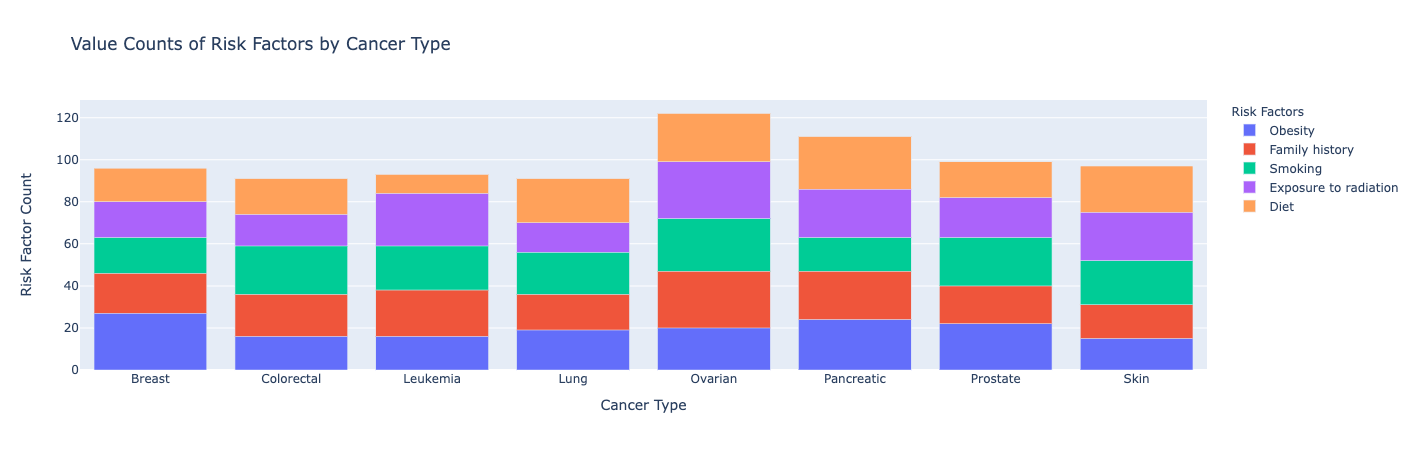

In [25]:
# Group the data by cancer type and obtain value counts of risk factors
risk_factor_counts = data.groupby('cancer_type')['risk_factors'].value_counts().reset_index(name='count')

# Create an interactive bar plot
fig = px.bar(risk_factor_counts, x='cancer_type', y='count', color='risk_factors',
             title='Value Counts of Risk Factors by Cancer Type',
             labels={'cancer_type': 'Cancer Type', 'count': ' Risk Factor Count', 'risk_factors': 'Risk Factors'})

# Show the plot
fig.show()

Create a 3D Scatter Plot of Height, Weight, and Cancer Signature, using plotly:

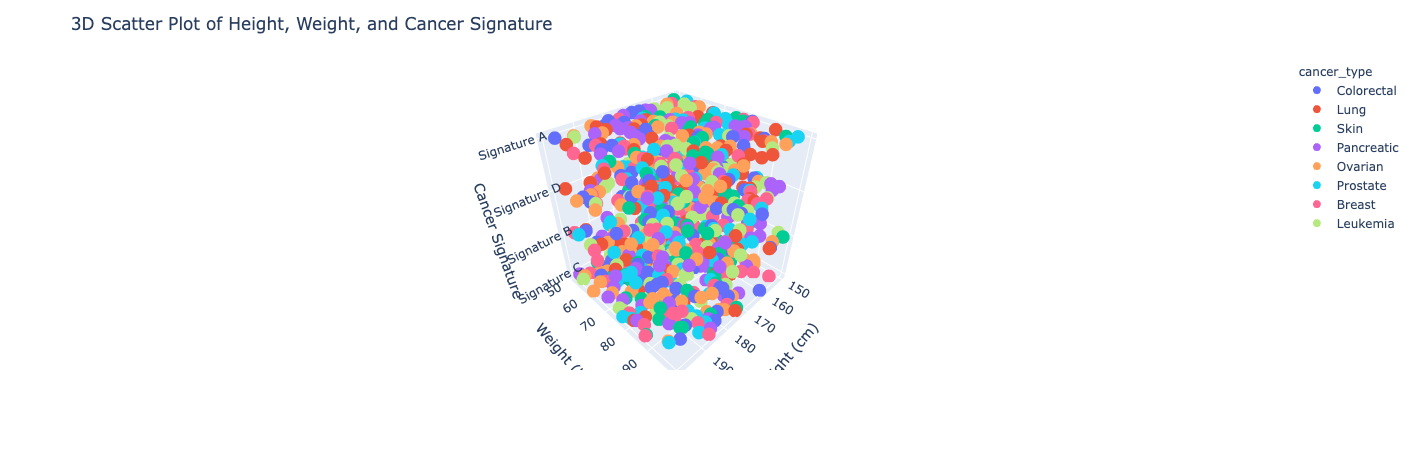

In [26]:
# 3D Scatter Plot of Height, Weight, and Cancer Signature
fig = px.scatter_3d(data, x='height', y='weight', z='cancer_signature', color='cancer_type')
fig.update_layout(scene=dict(xaxis_title='Height (cm)', yaxis_title='Weight (kg)', zaxis_title='Cancer Signature'),
                  title='3D Scatter Plot of Height, Weight, and Cancer Signature')
fig.show()

Plot a pie chart of gender distribution in the cohort: 

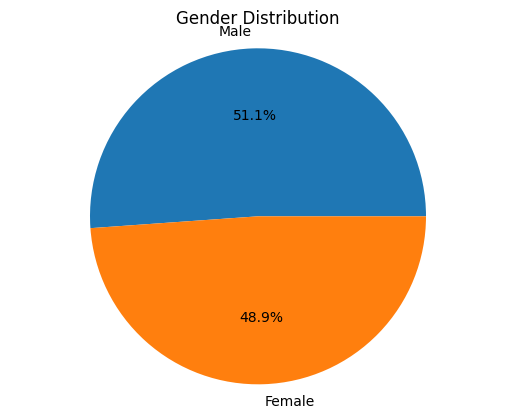

In [29]:
# Plot 9: Pie Chart of Gender Distribution
gender_counts = data['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

Having analysed and plotted the data in these exercises, return to the **bash_notebook.ipynb**